## Libraries for Time-Series Analysis

In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Tesla Stock TSA

In [2]:
df_tsla = pdr.get_data_yahoo('TSLA')
df_tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


In [3]:
type(df_tsla)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Date'>

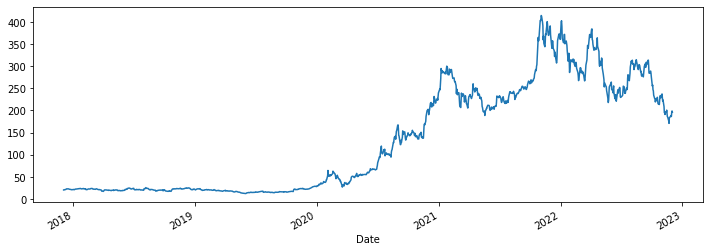

In [4]:
df_tsla['High'].plot(figsize=(12,4))

### Plot: Using x-limit & y-limit

<AxesSubplot:xlabel='Date'>

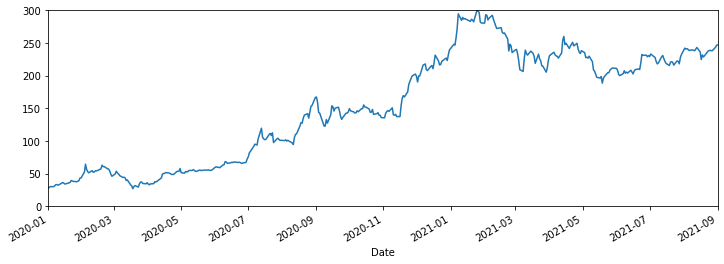

In [5]:
df_tsla['High'].plot(xlim=['2020-01-01','2021-09-01'], ylim=[0,300], figsize=(12,4))

### Plot: line-color & line-style change

<AxesSubplot:xlabel='Date'>

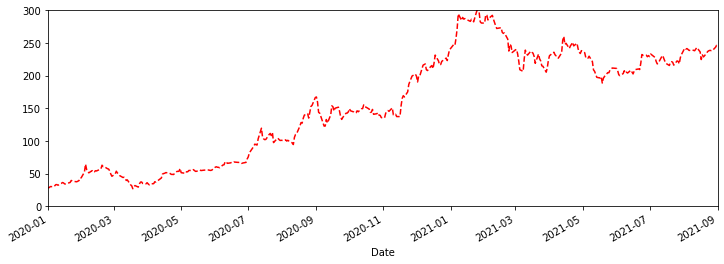

In [6]:
df_tsla['High'].plot(xlim=['2020-01-01','2021-09-01'], ylim=[0,300], figsize=(12,4), ls='--', c='red')

### Typical plotting techinque

In [7]:
index = df_tsla.loc['2020-01-01':'2021-09-01'].index
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [8]:
share_open = df_tsla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

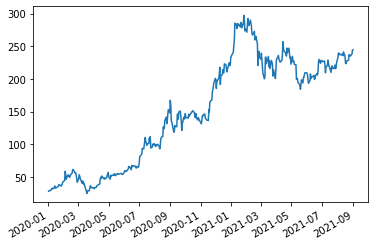

In [9]:
figure, axis = plt.subplots()
figure.autofmt_xdate()          #! auto formats the x-axis labels
axis.plot(index, share_open)

### Converting date index to column

In [10]:
df_tsla = df_tsla.reset_index()
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   High       1259 non-null   float64       
 2   Low        1259 non-null   float64       
 3   Open       1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Volume     1259 non-null   float64       
 6   Adj Close  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 69.0 KB


### Convert date column from object to datetime

In [11]:
pd.to_datetime(df_tsla['Date'])

0      2017-12-04
1      2017-12-05
2      2017-12-06
3      2017-12-07
4      2017-12-08
          ...    
1254   2022-11-28
1255   2022-11-29
1256   2022-11-30
1257   2022-12-01
1258   2022-12-02
Name: Date, Length: 1259, dtype: datetime64[ns]

### Set date column to index

In [12]:
df_tsla = df_tsla.set_index('Date', drop=True)
df_tsla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667


### Different Datetime library functions

In [13]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [14]:
datetime.now()

datetime.datetime(2022, 12, 4, 22, 38, 1, 818054)

In [15]:
def add_num(num1, num2):
    return num1+num2

#### Execution Time measurement

In [16]:
start_time = datetime.now().microsecond
num1 = 20
num2 = 30
n = 0
while n < 10:
    n = n + 1
    c = add_num(n-1, n)
    print(c)
    
end_time = datetime.now().microsecond
print(f'elapsed time: {end_time-start_time}ms')

1
3
5
7
9
11
13
15
17
19
elapsed time: 3999ms


In [17]:
date = datetime(2022, 11, 21)
date

datetime.datetime(2022, 11, 21, 0, 0)

In [18]:
date.date()

datetime.date(2022, 11, 21)

In [19]:
date.day

21

In [20]:
date.weekday()

0

In [21]:
date.year

2022

### Time Resampling

In [22]:
df_tsla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,20.551332,20.040667,20.433332,20.346666,87526500.0,20.346666
2017-12-05,20.533333,20.066668,20.133333,20.246668,69697500.0,20.246668
2017-12-06,20.892668,20.000000,20.006666,20.884001,107929500.0,20.884001
2017-12-07,21.242001,20.736668,20.799999,20.749332,71709000.0,20.749332
2017-12-08,21.132000,20.750668,20.973333,21.008667,52027500.0,21.008667
...,...,...,...,...,...,...
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997


#### **Rule=A** for Yearly frequency

In [23]:
df_tsla.resample(rule='A')

In [24]:
df_tsla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,20.533333,20.000000,20.006666,20.246668,52027500.0,20.246668
2018-12-31,17.355333,16.306000,16.851999,16.704000,46210500.0,16.704000
2019-12-31,12.445333,11.799333,12.073333,11.931333,36984000.0,11.931333
2020-12-31,26.990667,23.367332,24.980000,24.081333,52073100.0,24.081333
2021-12-31,188.736664,179.830002,184.183334,187.666672,29401800.0,187.666672
2022-12-31,170.919998,166.190002,168.630005,167.869995,41864700.0,167.869995


In [25]:
df_tsla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-12-31,25.830667,24.474667,25.000000,25.304667,504745500.0,25.304667
2019-12-31,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334
2020-12-31,239.573334,230.373337,233.330002,235.223328,914082000.0,235.223328
2021-12-31,414.496674,405.666656,411.470001,409.970001,268189500.0,409.970001
2022-12-31,402.666656,378.679993,396.516663,399.926666,151565700.0,399.926666


<AxesSubplot:xlabel='Date'>

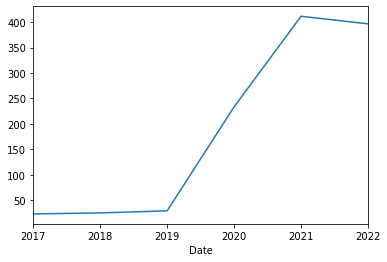

In [26]:
df_tsla.resample(rule='A').max()['Open'].plot()

#### **Rule=QS** for Quarterly frequency

In [27]:
df_tsla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-10-01,23.162666,22.505333,22.993334,22.896667,130998000.0,22.896667
2018-01-01,24.033333,23.490667,24.000000,23.827999,315021000.0,23.827999
2018-04-01,24.915333,23.633333,24.344000,24.722000,335211000.0,24.722000
2018-07-01,25.830667,24.474667,24.606001,25.304667,504745500.0,25.304667
2018-10-01,25.299334,24.450001,25.000000,25.119333,411382500.0,25.119333
2019-01-01,23.466667,22.943333,23.080667,23.153999,362262000.0,23.153999
2019-04-01,19.744667,19.144667,19.219999,19.454000,398206500.0,19.454000
2019-07-01,17.738001,17.210667,17.278000,17.658667,336274500.0,17.658667
2019-10-01,29.020666,28.423332,29.000000,28.729334,450091500.0,28.729334


#### Plot: Quarterly Data

<AxesSubplot:xlabel='Date'>

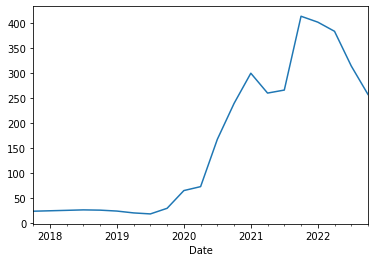

In [28]:
df_tsla.resample(rule='QS').max()['High'].plot()

#### **Rule=BA** for Business End frequency

<AxesSubplot:xlabel='Date'>

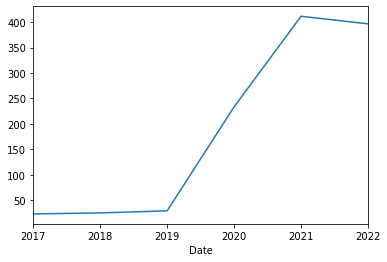

In [29]:
df_tsla.resample(rule='BA').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

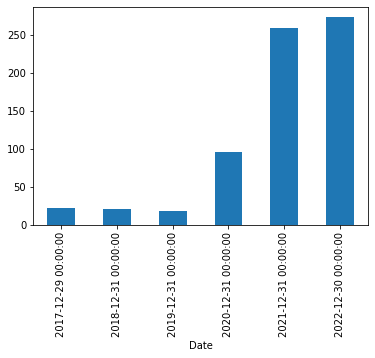

In [30]:
df_tsla['Open'].resample(rule='BA').mean().plot(kind='bar')

#### **Rule=BQS** for Business end Quarter Frequency

<AxesSubplot:xlabel='Date'>

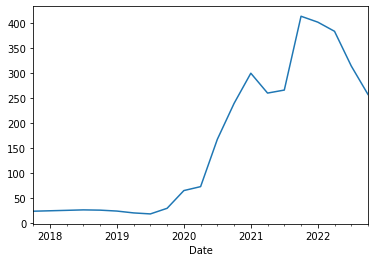

In [31]:
df_tsla.resample(rule='BQS').max()['High'].plot()

#### **Rule=M** for Month end Frequency

<AxesSubplot:xlabel='Date'>

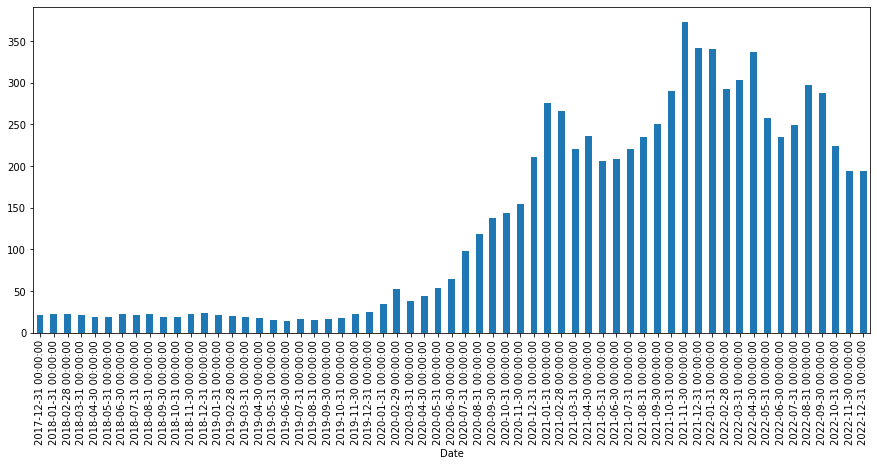

In [32]:
df_tsla.resample(rule='M').mean()['Open'].plot(kind='bar', figsize=(15,6))

### Rolling Window function

In [33]:
df_tsla['High'].rolling(10).mean().head(20)

Date
2017-12-04          NaN
2017-12-05          NaN
2017-12-06          NaN
2017-12-07          NaN
2017-12-08          NaN
2017-12-11          NaN
2017-12-12          NaN
2017-12-13          NaN
2017-12-14          NaN
2017-12-15    21.808533
2017-12-18    22.064933
2017-12-19    22.288200
2017-12-20    22.419600
2017-12-21    22.520333
2017-12-22    22.613267
2017-12-26    22.579467
2017-12-27    22.421067
2017-12-28    22.231733
2017-12-29    22.024867
2018-01-02    21.879600
Name: High, dtype: float64

#### 5 days & 30 days rolling function

In [34]:
df_tsla['Open:5 days rolling'] = df_tsla['Open'].rolling(5).mean()
df_tsla['Open:30 days rolling'] = df_tsla['Open'].rolling(30).mean()
df_tsla.tail()

,High,Low,Open,Close,Volume,Adj Close,Open:5 days rolling,Open:30 days rolling
Date,,,,,,,,
2022-11-28,188.500000,179.000000,179.960007,182.919998,92905200.0,182.919998,176.614005,202.878668
2022-11-29,186.380005,178.750000,184.990005,180.830002,83357100.0,180.830002,178.442004,202.043668
2022-11-30,194.759995,180.630005,182.429993,194.699997,109186400.0,194.699997,181.202002,200.474668
2022-12-01,198.919998,191.800003,197.080002,194.699997,80046200.0,194.699997,185.904001,199.717334
2022-12-02,196.250000,191.110001,191.779999,194.860001,73533400.0,194.860001,187.248001,199.167334


#### Plot: 5 days & 30 days rolling function

<AxesSubplot:xlabel='Date'>

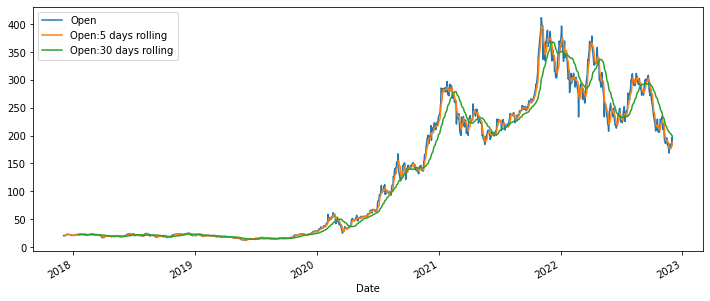

In [35]:
df_tsla[['Open', 'Open:5 days rolling', 'Open:30 days rolling']].plot(figsize=(12,5))

## Tasks:
1. Read Microsoft data using pdr
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock? 

### Task-1: Microsoft data using pdr

In [36]:
df_msft = pdr.get_data_yahoo('MSFT')
df_msft

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-04,84.430000,80.699997,84.419998,81.080002,39094900.0,76.354256
2017-12-05,82.680000,80.980003,81.339996,81.589996,26152300.0,76.834503
2017-12-06,83.139999,81.430000,81.550003,82.779999,26162100.0,77.955147
2017-12-07,82.800003,82.000000,82.540001,82.489998,23184500.0,77.682053
2017-12-08,84.580002,83.330002,83.629997,84.160004,24489100.0,79.254730
...,...,...,...,...,...,...
2022-11-28,246.649994,240.800003,246.080002,241.759995,24778200.0,241.759995
2022-11-29,242.789993,238.210007,241.399994,240.330002,17956300.0,240.330002
2022-11-30,255.330002,239.860001,240.570007,255.139999,47553800.0,255.139999


### Task-2: Maximum price of the share from 2017 to 2022

In [37]:
df_msft['High'].max()

349.6700134277344

### Task-3: Date of the highest price of the stock

In [38]:
df_msft.loc[df_msft['High'] == df_msft['High'].max()]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-11-22,349.670013,339.549988,344.619995,339.829987,31031100.0,336.675262


In [39]:
stock_max_date = df_msft.loc[df_msft['High'] == df_msft['High'].max()]
stock_max_date.index[0]

Timestamp('2021-11-22 00:00:00')

### Task-4: Date of the lowest price of the stock

In [40]:
stock_min_date = df_msft.loc[df_msft['Low'] == df_msft['Low'].min()]
stock_min_date.index[0]

Timestamp('2017-12-04 00:00:00')